<a href="https://colab.research.google.com/github/vishnu-1221/project/blob/main/gradientboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


#loading the dataset to a pandas DataFrame
data=pd.read_csv("/content/heart_disease_data.csv.crdownload")

#number of rows and columns
print(data.shape)

#statistical measures of the data
data.describe()
data.head()


(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
#splitting the data into independent and dependent variable
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

[0.06943438 0.05428192 0.13113559 0.06371606 0.05840051 0.02045608
 0.03585032 0.08443427 0.09823132 0.08951651 0.07082033 0.12142304
 0.10229967]


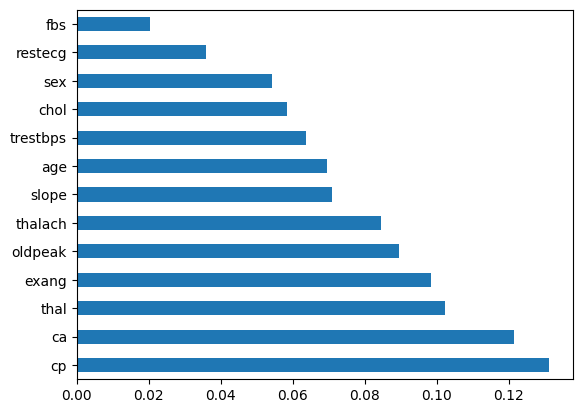

In [4]:
#importing extratree classifier for selecting the relevant features
from sklearn.ensemble import ExtraTreesClassifier
model=ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_)

#plotting the bar graph for the feature importance
feat_imp=pd.Series(model.feature_importances_,index=x.columns)
feat_imp.nlargest(20).plot(kind='barh')
plt.show()

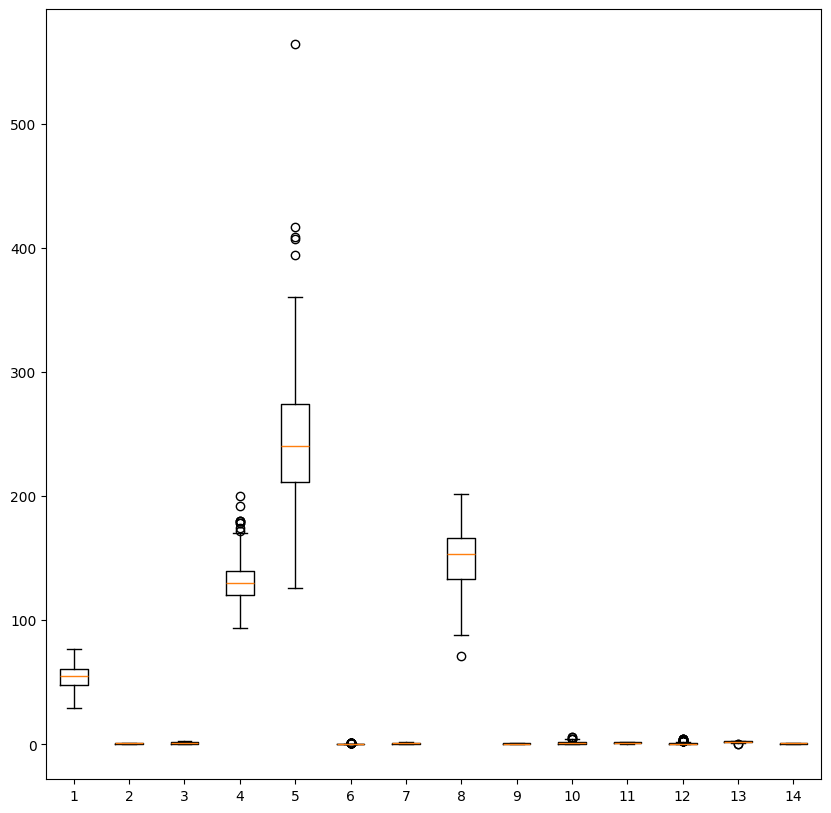

0


In [5]:
#plotting boxplot for visualizing the outliers
fig=plt.figure(figsize=(10,10))
plt.boxplot(data)
plt.show()
data1=data.copy()
for col in data1.columns:
    Q1 = data1[col].quantile(0.25)
    Q3 = data1[col].quantile(0.75)
    IQR = Q3 - Q1
    data2 = data1[(data1[col] >= Q1 - 1.5 * IQR) & (data1[col] <= Q3 + 1.5 * IQR)]

#checking the number of outliers present in the dataset
print(len(data1)-len(data2))

In [6]:
#importing train test split and gridsearchcv(for hyperparameter tunning)
from sklearn.model_selection import train_test_split, GridSearchCV
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [31]:
#importing algorithms
from sklearn.ensemble import GradientBoostingClassifier
model=GradientBoostingClassifier()
parameters={'criterion':['friedman_mse'], 'max_depth':[7,10],'min_samples_split':[5,7], 'n_estimators':[100,150], 'max_features':['sqrt'], 'learning_rate':[0.1, 0.3, 0.5], }
trait=GridSearchCV(model,parameters,cv=5)
#fitting the model with training valiues
trait.fit(x_train,y_train)
y_pred=trait.predict(x_test)
print(trait.best_params_)


{'criterion': 'friedman_mse', 'learning_rate': 0.3, 'max_depth': 7, 'max_features': 'sqrt', 'min_samples_split': 7, 'n_estimators': 100}


In [32]:
#importing performance metrics for model evaluation
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,precision_score, recall_score, f1_score
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.819672131147541
              precision    recall  f1-score   support

           0       0.80      0.83      0.81        29
           1       0.84      0.81      0.83        32

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61

[[24  5]
 [ 6 26]]
